# - TÍTULO: DIAGNÓSTICO EM CASOS DE HOSPITALIZAÇÃO POR INFLUENZA (H3N2) OU COVID-19 ATRAVÉS DOS SINTOMAS

## Durante o período de DEZ/2021 e JAN/2022 ocorrorem muitos casos de INFLUENZA (H3N2) e ficava a dúvida se apenas era uma gripe forte de Influenza (H3N2) ou COVID-19 durante esse período.

### Foi avaliado o banco de dados de Síndrome Respiratória Aguda Grave (SRAG), que encontra-se em (https://opendatasus.saude.gov.br/dataset/srag-2021-e-2022), disponibilizado pelo Ministério da Saúde no SUS. 

### Também, foi avaliado o banco de dados do IBGE com o censo municipal do índice de Gini de 2010.

# - PARTE 1

## - SCRIPT PARA: COLETA DE DADOS | PROCESSAMENTO E TRATAMENTO DOS DADOS | ANÁLISE E EXPLORAÇÃO DOS DADOS

### Importação das bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1 Coleta dos dados e seleção de atributos do banco de dados SRAG (Síndrome de Respiratória Aguda Grave) de 2022

In [2]:
SRAG_22 = r'......\datasets\INFLUD22-13-06-2022.csv'
dados_22dt = pd.read_csv(SRAG_22, delimiter=';', 
usecols='DT_SIN_PRI CLASSI_FIN SEM_PRI FEBRE TOSSE GARGANTA DISPNEIA DESC_RESP SATURACAO DIARREIA VOMITO OUTRO_SIN DOR_ABD FADIGA PERD_OLFT PERD_PALA HOSPITAL CO_MUN_NOT'.split(),
encoding='ISO-8859-1')
dados_22dt.rename(columns={'CO_MUN_NOT':'IBGE'}, inplace=True)

dados_22 = dados_22dt

print(dados_22dt)

        DT_SIN_PRI  SEM_PRI    IBGE  FEBRE  TOSSE  GARGANTA  DISPNEIA  \
0       02/01/2022        1  314460    1.0    1.0       2.0       1.0   
1       02/01/2022        1  355030    1.0    NaN       NaN       NaN   
2       02/01/2022        1  355030    2.0    2.0       2.0       2.0   
3       03/01/2022        1  432300    NaN    1.0       1.0       1.0   
4       03/01/2022        1  355030    2.0    1.0       1.0       1.0   
...            ...      ...     ...    ...    ...       ...       ...   
303359  23/05/2022       21  310620    2.0    1.0       2.0       2.0   
303360  31/05/2022       22  412350    2.0    2.0       2.0       1.0   
303361  30/05/2022       22  355030    2.0    2.0       2.0       2.0   
303362  06/06/2022       23  355030    NaN    NaN       NaN       NaN   
303363  11/06/2022       23  354980    2.0    1.0       2.0       1.0   

        DESC_RESP  SATURACAO  DIARREIA  VOMITO  OUTRO_SIN  HOSPITAL  \
0             2.0        1.0       2.0     2.0      

In [3]:
dados_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303364 entries, 0 to 303363
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DT_SIN_PRI  303364 non-null  object 
 1   SEM_PRI     303364 non-null  int64  
 2   IBGE        303364 non-null  int64  
 3   FEBRE       241717 non-null  float64
 4   TOSSE       258043 non-null  float64
 5   GARGANTA    204954 non-null  float64
 6   DISPNEIA    247264 non-null  float64
 7   DESC_RESP   231635 non-null  float64
 8   SATURACAO   236055 non-null  float64
 9   DIARREIA    197206 non-null  float64
 10  VOMITO      198146 non-null  float64
 11  OUTRO_SIN   200509 non-null  float64
 12  HOSPITAL    290541 non-null  float64
 13  CLASSI_FIN  260539 non-null  float64
 14  DOR_ABD     193928 non-null  float64
 15  FADIGA      202335 non-null  float64
 16  PERD_OLFT   191156 non-null  float64
 17  PERD_PALA   190935 non-null  float64
dtypes: float64(15), int64(2), object(1)
memory u

In [4]:
dados_22 = dados_22.drop('DT_SIN_PRI', axis=1)

In [5]:
dados_22.shape

(303364, 17)

## MUITOS NUMEROS VAZIOS SAO SINTOMAS, E ISSO DEVE OCORRER QUE AS PESSOAS QUE ESTAVAM COLETANDO AMOSTRAS E ANOTARAM SIM PARA OS SINTOMAS PRESENTES E DEIXARAM EM OS SINTOMAS AUSENTES EM BRANCO (NÃO MARCARAM 'NÃO') 

In [6]:
dados_22.isnull().sum(axis = 0)

SEM_PRI            0
IBGE               0
FEBRE          61647
TOSSE          45321
GARGANTA       98410
DISPNEIA       56100
DESC_RESP      71729
SATURACAO      67309
DIARREIA      106158
VOMITO        105218
OUTRO_SIN     102855
HOSPITAL       12823
CLASSI_FIN     42825
DOR_ABD       109436
FADIGA        101029
PERD_OLFT     112208
PERD_PALA     112429
dtype: int64

# 2 Processamento/tratamento dos dados

## 2.1 Substitui os valores nulos em valores '0'

In [7]:
dados_22['FEBRE'] = dados_22['FEBRE'].fillna(0)
dados_22['TOSSE'] = dados_22['TOSSE'].fillna(0)
dados_22['GARGANTA'] = dados_22['GARGANTA'].fillna(0)
dados_22['DISPNEIA'] = dados_22['DISPNEIA'].fillna(0)
dados_22['DESC_RESP'] = dados_22['DESC_RESP'].fillna(0)
dados_22['SATURACAO'] = dados_22['SATURACAO'].fillna(0)
dados_22['DIARREIA'] = dados_22['DIARREIA'].fillna(0)
dados_22['VOMITO'] = dados_22['VOMITO'].fillna(0)
dados_22['OUTRO_SIN'] = dados_22['OUTRO_SIN'].fillna(0)
dados_22['DOR_ABD'] = dados_22['DOR_ABD'].fillna(0)
dados_22['FADIGA'] = dados_22['FADIGA'].fillna(0)
dados_22['PERD_OLFT'] = dados_22['PERD_OLFT'].fillna(0)
dados_22['PERD_PALA'] = dados_22['PERD_PALA'].fillna(0)

In [8]:
dados_22.shape

(303364, 17)

## VALORES AUSENTES DAS AMOSTRAS FERENTES AOS SINTOMAS FORAM REGISTRADO COMO 'NÃO' (0.0) 

In [9]:
dados_22.isnull().sum(axis = 0)

SEM_PRI           0
IBGE              0
FEBRE             0
TOSSE             0
GARGANTA          0
DISPNEIA          0
DESC_RESP         0
SATURACAO         0
DIARREIA          0
VOMITO            0
OUTRO_SIN         0
HOSPITAL      12823
CLASSI_FIN    42825
DOR_ABD           0
FADIGA            0
PERD_OLFT         0
PERD_PALA         0
dtype: int64

## 2.2 Seleciona apenas as amostras que foram hospitalizadas ou por COVID ou por INFLUENZA

In [10]:
dados_22.drop(dados_22.index[dados_22['CLASSI_FIN'] == 2], inplace = True)
dados_22.drop(dados_22.index[dados_22['CLASSI_FIN'] == 3], inplace = True)
dados_22.drop(dados_22.index[dados_22['CLASSI_FIN'] == 4], inplace = True)
dados_22.drop(dados_22.index[dados_22['HOSPITAL'] == 2], inplace = True)
dados_22.drop(dados_22.index[dados_22['HOSPITAL'] == 9], inplace = True)


dados_22 = dados_22.dropna(axis=0, subset=['CLASSI_FIN'])
dados_22 = dados_22.dropna(axis=0, subset=['HOSPITAL'])

In [11]:
dados_22.isnull().sum(axis = 0)

SEM_PRI       0
IBGE          0
FEBRE         0
TOSSE         0
GARGANTA      0
DISPNEIA      0
DESC_RESP     0
SATURACAO     0
DIARREIA      0
VOMITO        0
OUTRO_SIN     0
HOSPITAL      0
CLASSI_FIN    0
DOR_ABD       0
FADIGA        0
PERD_OLFT     0
PERD_PALA     0
dtype: int64

## 2.3 Substitui valores dos sintomas para lógica binária (booleana)

### INCLUSIVE OS VALORES DE CLASSIFICAÇÃO (CLASSI_FIN), SENDO REGISTRADOS COVID-19 = 1.0 | INFLUENZA (H3N2) = 0.0

### ESSES VALORES FICARAM DIVIDOS DESSA FORMA PARA O ALGORITMO PREVER A PARTIR DOS SINTOMAS DO PACIENTE, SE ELE FOI HOSPITALIZADO POR COVID-19 OU INFLUENZA 

In [12]:
dados_22.CLASSI_FIN.replace([1], [0], inplace=True)
dados_22.CLASSI_FIN.replace([5], [1], inplace=True)
dados_22.FEBRE.replace([2], [0], inplace=True)
dados_22.TOSSE.replace([2], [0], inplace=True)
dados_22.GARGANTA.replace([2], [0], inplace=True)
dados_22.DISPNEIA.replace([2], [0], inplace=True)
dados_22.DESC_RESP.replace([2], [0], inplace=True)
dados_22.SATURACAO.replace([2], [0], inplace=True)
dados_22.DIARREIA.replace([2], [0], inplace=True)
dados_22.VOMITO.replace([2], [0], inplace=True)
dados_22.OUTRO_SIN.replace([2], [0], inplace=True)
dados_22.DOR_ABD.replace([2], [0], inplace=True)
dados_22.FADIGA.replace([2], [0], inplace=True)
dados_22.PERD_OLFT.replace([2], [0], inplace=True)
dados_22.PERD_PALA.replace([2], [0], inplace=True)

dados_22.CLASSI_FIN.replace([9], [0], inplace=True)
dados_22.FEBRE.replace([9], [0], inplace=True)
dados_22.TOSSE.replace([9], [0], inplace=True)
dados_22.GARGANTA.replace([9], [0], inplace=True)
dados_22.DISPNEIA.replace([9], [0], inplace=True)
dados_22.DESC_RESP.replace([9], [0], inplace=True)
dados_22.SATURACAO.replace([9], [0], inplace=True)
dados_22.DIARREIA.replace([9], [0], inplace=True)
dados_22.VOMITO.replace([9], [0], inplace=True)
dados_22.OUTRO_SIN.replace([9], [0], inplace=True)
dados_22.DOR_ABD.replace([9], [0], inplace=True)
dados_22.FADIGA.replace([9], [0], inplace=True)
dados_22.PERD_OLFT.replace([9], [0], inplace=True)
dados_22.PERD_PALA.replace([9], [0], inplace=True)

dados_22.drop('HOSPITAL', axis=1, inplace=True)

In [13]:
dados_22.shape

(133566, 16)

In [14]:
dados_22['SEM_PRI'].value_counts()  

3     23920
2     20046
4     19982
5     15781
1     13320
6      9722
7      5908
8      3546
21     2729
9      2511
22     2345
20     2334
19     1759
10     1543
18     1253
11     1099
12      955
17      938
16      935
14      818
13      771
15      722
23      629
Name: SEM_PRI, dtype: int64

## Seleciona apenas as 4 semanas Do mês de JAN/2022

In [15]:
dados_22 = dados_22[dados_22['SEM_PRI'].isin([1,2,3,4])] 

In [16]:
dados_22.shape

(77268, 16)

# Repete-se o procedimento para o banco de dados de 2021

In [17]:
SRAG_21 = r'......\datasets\INFLUD21-13-06-2022.csv'
dados_21dt = pd.read_csv(SRAG_21, delimiter=';', 
usecols='DT_SIN_PRI CLASSI_FIN SEM_PRI FEBRE TOSSE GARGANTA DISPNEIA DESC_RESP SATURACAO DIARREIA VOMITO OUTRO_SIN DOR_ABD FADIGA PERD_OLFT PERD_PALA HOSPITAL CO_MUN_NOT'.split(),
encoding='ISO-8859-1')
dados_21dt.rename(columns={'CO_MUN_NOT':'IBGE'}, inplace=True)

dados_21 = dados_21dt

print(dados_21dt)

         DT_SIN_PRI  SEM_PRI    IBGE  FEBRE  TOSSE  GARGANTA  DISPNEIA  \
0        04/01/2021        1  270430    1.0    1.0       2.0       1.0   
1        03/01/2021        1  500270    1.0    1.0       1.0       1.0   
2        03/01/2021        1  250750    1.0    1.0       NaN       1.0   
3        08/01/2021        1  410480    2.0    2.0       2.0       1.0   
4        05/01/2021        1  351880    2.0    2.0       2.0       1.0   
...             ...      ...     ...    ...    ...       ...       ...   
1728826  20/12/2021       51  330240    1.0    NaN       NaN       NaN   
1728827  06/03/2021        9  330500    NaN    NaN       1.0       1.0   
1728828  08/03/2021       10  354390    2.0    1.0       2.0       1.0   
1728829  17/12/2021       50  410690    NaN    NaN       NaN       NaN   
1728830  30/12/2021       52  261640    2.0    1.0       2.0       1.0   

         DESC_RESP  SATURACAO  DIARREIA  VOMITO  OUTRO_SIN  HOSPITAL  \
0              2.0        1.0       2.0

In [18]:
dados_21 = dados_21.drop('DT_SIN_PRI', axis=1)


In [19]:
dados_21.isnull().sum(axis = 0)

SEM_PRI            0
IBGE               0
FEBRE         312732
TOSSE         236108
GARGANTA      541457
DISPNEIA      226807
DESC_RESP     350717
SATURACAO     290113
DIARREIA      563199
VOMITO        581008
OUTRO_SIN     540085
HOSPITAL       47783
CLASSI_FIN    100187
DOR_ABD       603180
FADIGA        529850
PERD_OLFT     589604
PERD_PALA     590216
dtype: int64

In [20]:
dados_21['FEBRE'] = dados_21['FEBRE'].fillna(0)
dados_21['TOSSE'] = dados_21['TOSSE'].fillna(0)
dados_21['GARGANTA'] = dados_21['GARGANTA'].fillna(0)
dados_21['DISPNEIA'] = dados_21['DISPNEIA'].fillna(0)
dados_21['DESC_RESP'] = dados_21['DESC_RESP'].fillna(0)
dados_21['SATURACAO'] = dados_21['SATURACAO'].fillna(0)
dados_21['DIARREIA'] = dados_21['DIARREIA'].fillna(0)
dados_21['VOMITO'] = dados_21['VOMITO'].fillna(0)
dados_21['OUTRO_SIN'] = dados_21['OUTRO_SIN'].fillna(0)
dados_21['DOR_ABD'] = dados_21['DOR_ABD'].fillna(0)
dados_21['FADIGA'] = dados_21['FADIGA'].fillna(0)
dados_21['PERD_OLFT'] = dados_21['PERD_OLFT'].fillna(0)
dados_21['PERD_PALA'] = dados_21['PERD_PALA'].fillna(0)

In [21]:
dados_21.isnull().sum(axis = 0)

SEM_PRI            0
IBGE               0
FEBRE              0
TOSSE              0
GARGANTA           0
DISPNEIA           0
DESC_RESP          0
SATURACAO          0
DIARREIA           0
VOMITO             0
OUTRO_SIN          0
HOSPITAL       47783
CLASSI_FIN    100187
DOR_ABD            0
FADIGA             0
PERD_OLFT          0
PERD_PALA          0
dtype: int64

In [22]:
dados_21.drop(dados_21.index[dados_21['CLASSI_FIN'] == 2], inplace = True)
dados_21.drop(dados_21.index[dados_21['CLASSI_FIN'] == 3], inplace = True)
dados_21.drop(dados_21.index[dados_21['CLASSI_FIN'] == 4], inplace = True)
dados_21.drop(dados_21.index[dados_21['HOSPITAL'] == 2], inplace = True)
dados_21.drop(dados_21.index[dados_21['HOSPITAL'] == 9], inplace = True)


dados_21 = dados_21.dropna(axis=0, subset=['CLASSI_FIN'])
dados_21 = dados_21.dropna(axis=0, subset=['HOSPITAL'])

In [23]:
dados_21.isnull().sum(axis = 0)

SEM_PRI       0
IBGE          0
FEBRE         0
TOSSE         0
GARGANTA      0
DISPNEIA      0
DESC_RESP     0
SATURACAO     0
DIARREIA      0
VOMITO        0
OUTRO_SIN     0
HOSPITAL      0
CLASSI_FIN    0
DOR_ABD       0
FADIGA        0
PERD_OLFT     0
PERD_PALA     0
dtype: int64

In [24]:
dados_21.CLASSI_FIN.replace([1], [0], inplace=True)
dados_21.CLASSI_FIN.replace([5], [1], inplace=True)
dados_21.FEBRE.replace([2], [0], inplace=True)
dados_21.TOSSE.replace([2], [0], inplace=True)
dados_21.GARGANTA.replace([2], [0], inplace=True)
dados_21.DISPNEIA.replace([2], [0], inplace=True)
dados_21.DESC_RESP.replace([2], [0], inplace=True)
dados_21.SATURACAO.replace([2], [0], inplace=True)
dados_21.DIARREIA.replace([2], [0], inplace=True)
dados_21.VOMITO.replace([2], [0], inplace=True)
dados_21.OUTRO_SIN.replace([2], [0], inplace=True)
dados_21.DOR_ABD.replace([2], [0], inplace=True)
dados_21.FADIGA.replace([2], [0], inplace=True)
dados_21.PERD_OLFT.replace([2], [0], inplace=True)
dados_21.PERD_PALA.replace([2], [0], inplace=True)

dados_21.CLASSI_FIN.replace([9], [0], inplace=True)
dados_21.FEBRE.replace([9], [0], inplace=True)
dados_21.TOSSE.replace([9], [0], inplace=True)
dados_21.GARGANTA.replace([9], [0], inplace=True)
dados_21.DISPNEIA.replace([9], [0], inplace=True)
dados_21.DESC_RESP.replace([9], [0], inplace=True)
dados_21.SATURACAO.replace([9], [0], inplace=True)
dados_21.DIARREIA.replace([9], [0], inplace=True)
dados_21.VOMITO.replace([9], [0], inplace=True)
dados_21.OUTRO_SIN.replace([9], [0], inplace=True)
dados_21.DOR_ABD.replace([9], [0], inplace=True)
dados_21.FADIGA.replace([9], [0], inplace=True)
dados_21.PERD_OLFT.replace([9], [0], inplace=True)
dados_21.PERD_PALA.replace([9], [0], inplace=True)

dados_21.drop('HOSPITAL', axis=1, inplace=True)

In [25]:
dados_21.shape

(1170556, 16)

In [26]:
dados_21['SEM_PRI'].value_counts()  

10    61519
11    60679
9     60245
12    48429
13    45561
19    44861
20    44035
14    42826
21    42669
8     42268
22    41592
18    38976
17    38365
7     38199
15    36548
16    36438
23    35120
24    29396
6     28649
5     25155
25    24993
1     24871
2     23579
26    22220
3     21534
4     20189
27    19985
28    16168
29    14969
31    13530
30    12689
32    11274
33    10368
34     8546
52     8457
35     8167
36     7457
37     6848
38     6390
39     5717
51     5564
40     4393
41     4190
50     3713
42     3673
43     3292
44     3044
49     2993
46     2725
45     2625
48     2570
47     2293
Name: SEM_PRI, dtype: int64

## Seleciona apenas as 4 semanas do mês de DEZ/2021

In [27]:
dados_21 = dados_21[dados_21['SEM_PRI'].isin([52,51,50,49,48])] 

In [28]:
dados_21.shape

(23297, 16)

# 3 Análise/exploração dos dados

## 3.1 O seguinte protocolo faz a união dos dados de DEZ/2021 e JAN/2022

In [29]:
merged_df = pd.concat([dados_21, dados_22])

In [30]:
merged_df

,SEM_PRI,IBGE,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,CLASSI_FIN,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
4749,49,520870,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4765,51,250750,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4767,50,110002,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4771,51,314330,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4798,51,315210,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303222,3,314390,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
303224,4,353070,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
303225,2,510340,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
303235,4,310620,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 3.1.1 Transforma o dataset apenas em sintomas

In [31]:
merged_df.drop('SEM_PRI', axis=1, inplace=True)
merged_df.drop('IBGE', axis=1, inplace=True)
merged_df.drop('CLASSI_FIN', axis=1, inplace=True)

merged_df.shape
merged_df.reset_index(drop=True, inplace=True)

In [32]:
print(merged_df)

        FEBRE  TOSSE  GARGANTA  DISPNEIA  DESC_RESP  SATURACAO  DIARREIA  \
0         0.0    0.0       0.0       1.0        1.0        1.0       0.0   
1         1.0    0.0       1.0       0.0        0.0        0.0       0.0   
2         0.0    0.0       0.0       1.0        1.0        1.0       0.0   
3         1.0    1.0       1.0       0.0        0.0        1.0       0.0   
4         1.0    1.0       0.0       1.0        1.0        1.0       0.0   
...       ...    ...       ...       ...        ...        ...       ...   
100560    1.0    1.0       0.0       0.0        0.0        1.0       0.0   
100561    1.0    1.0       1.0       0.0        0.0        1.0       0.0   
100562    0.0    1.0       1.0       1.0        1.0        1.0       0.0   
100563    0.0    0.0       0.0       1.0        0.0        0.0       0.0   
100564    0.0    0.0       0.0       0.0        0.0        0.0       0.0   

        VOMITO  OUTRO_SIN  DOR_ABD  FADIGA  PERD_OLFT  PERD_PALA  
0          0.0      

In [33]:
merged_df 

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100560,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100561,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
100562,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100563,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.2 RELAÇÃO DE NÚMERO DE PACIENTES HOSPITALIZADOS E OS SINTOMAS APRESENTADOS EM DEZEMBRO E JANEIRO

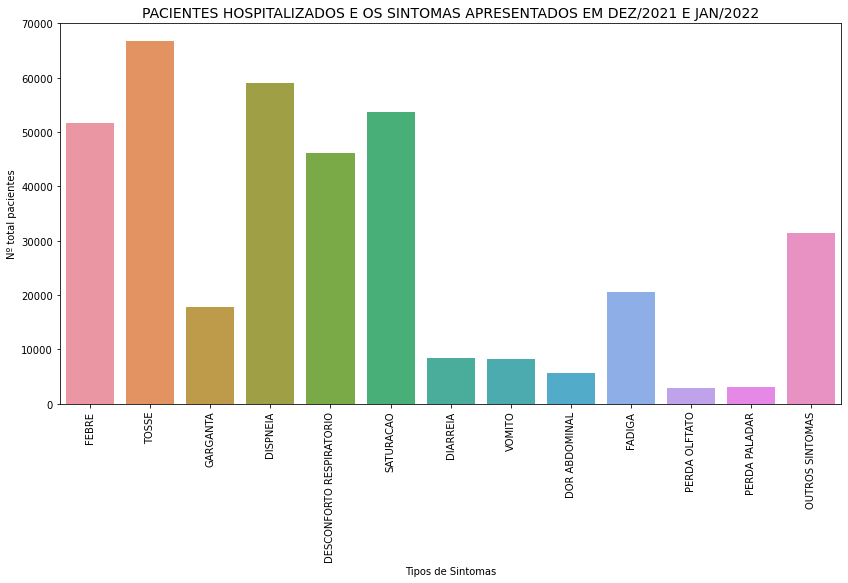

,Sintoma,Quantidade_Total,%
1,TOSSE,66678.0,66.30
3,DISPNEIA,59026.0,58.69
5,SATURACAO,53693.0,53.39
0,FEBRE,51663.0,51.37
4,DESCONFORTO RESPIRATORIO,46056.0,45.80
12,OUTROS SINTOMAS,31458.0,31.28
9,FADIGA,20503.0,20.39
2,GARGANTA,17831.0,17.73
6,DIARREIA,8417.0,8.37
7,VOMITO,8165.0,8.12


In [34]:
qtde_febre = merged_df.groupby(['FEBRE']).size().reset_index(name='counts')
qtde_tosse = merged_df.groupby(['TOSSE']).size().reset_index(name='counts')
qtde_garganta = merged_df.groupby(['GARGANTA']).size().reset_index(name='counts')
qtde_dispneia = merged_df.groupby(['DISPNEIA']).size().reset_index(name='counts')
qtde_resp = merged_df.groupby(['DESC_RESP']).size().reset_index(name='counts')
qtde_saturacao = merged_df.groupby(['SATURACAO']).size().reset_index(name='counts')
qtde_diarreia = merged_df.groupby(['DIARREIA']).size().reset_index(name='counts')
qtde_vomito = merged_df.groupby(['VOMITO']).size().reset_index(name='counts')
qtde_dor_abd = merged_df.groupby(['DOR_ABD']).size().reset_index(name='counts')
qtde_fadiga = merged_df.groupby(['FADIGA']).size().reset_index(name='counts')
qtde_perda_olft = merged_df.groupby(['PERD_OLFT']).size().reset_index(name='counts')
qtde_perda_paladar = merged_df.groupby(['PERD_PALA']).size().reset_index(name='counts')
qtde_outros = merged_df.groupby(['OUTRO_SIN']).size().reset_index(name='counts')




query_febre     = qtde_febre.query('FEBRE == 1')
query_tosse     = qtde_tosse.query('TOSSE == 1')
query_garganta  = qtde_garganta.query('GARGANTA == 1')
query_dispneia  = qtde_dispneia.query('DISPNEIA == 1')
query_resp      = qtde_resp.query('DESC_RESP == 1')
query_saturacao = qtde_saturacao.query('SATURACAO == 1')
query_diarreia  = qtde_diarreia.query('DIARREIA == 1')
query_vomito    = qtde_vomito.query('VOMITO == 1')
query_dor_abd   = qtde_dor_abd.query('DOR_ABD == 1')
query_fadiga    = qtde_fadiga.query('FADIGA == 1')
query_perda_olft = qtde_perda_olft.query('PERD_OLFT == 1')
query_perda_paladar = qtde_perda_paladar.query('PERD_PALA == 1')
query_outros        = qtde_outros.query('OUTRO_SIN == 1')

dados = [['FEBRE',query_febre.iloc[0].counts, float('{:.2f}'.format((query_febre.iloc[0].counts / merged_df['FEBRE'].count() ) * 100))],	
         ['TOSSE',query_tosse.iloc[0].counts, float('{:.2f}'.format((query_tosse.iloc[0].counts / merged_df['TOSSE'].count() ) * 100))],	
         ['GARGANTA',query_garganta.iloc[0].counts, float('{:.2f}'.format((query_garganta.iloc[0].counts / merged_df['GARGANTA'].count() ) * 100))],	
         ['DISPNEIA',query_dispneia.iloc[0].counts, float('{:.2f}'.format((query_dispneia.iloc[0].counts / merged_df['DISPNEIA'].count() ) * 100))],	
         ['DESCONFORTO RESPIRATORIO',query_resp.iloc[0].counts, float('{:.2f}'.format((query_resp.iloc[0].counts / merged_df['DESC_RESP'].count() ) * 100))],	
         ['SATURACAO',query_saturacao.iloc[0].counts, float('{:.2f}'.format((query_saturacao.iloc[0].counts / merged_df['SATURACAO'].count() ) * 100))],	
         ['DIARREIA',query_diarreia.iloc[0].counts, float('{:.2f}'.format((query_diarreia.iloc[0].counts / merged_df['DIARREIA'].count() ) * 100))],	
         ['VOMITO',query_vomito.iloc[0].counts, float('{:.2f}'.format((query_vomito.iloc[0].counts / merged_df['VOMITO'].count() ) * 100))],	
         ['DOR ABDOMINAL',query_dor_abd.iloc[0].counts, float('{:.2f}'.format((query_dor_abd.iloc[0].counts / merged_df['DOR_ABD'].count() ) * 100))],	
         ['FADIGA',query_fadiga.iloc[0].counts, float('{:.2f}'.format((query_fadiga.iloc[0].counts / merged_df['FADIGA'].count() ) * 100))],
         ['PERDA OLFTATO',query_perda_olft.iloc[0].counts, float('{:.2f}'.format((query_perda_olft.iloc[0].counts / merged_df['PERD_OLFT'].count() ) * 100))],	
         ['PERDA PALADAR',query_perda_paladar.iloc[0].counts, float('{:.2f}'.format((query_perda_paladar.iloc[0].counts / merged_df['PERD_PALA'].count() ) * 100))],	
         ['OUTROS SINTOMAS',query_outros.iloc[0].counts, float('{:.2f}'.format((query_outros.iloc[0].counts / merged_df['OUTRO_SIN'].count() ) * 100))]]

sintomas = pd.DataFrame(dados, columns = ['Sintoma', 'Quantidade_Total', '%'])

plt.figure(figsize=(14,7))
bar_sintomas = sns.barplot(x="Sintoma", y="Quantidade_Total", data=sintomas)
bar_sintomas.set_xticklabels(bar_sintomas.get_xticklabels(),rotation=90);
plt.title('PACIENTES HOSPITALIZADOS E OS SINTOMAS APRESENTADOS EM DEZ/2021 E JAN/2022', fontsize=14)
bar_sintomas.set(xlabel='Tipos de Sintomas', ylabel='Nº total pacientes');
plt.show();
sintomas.sort_values(by='Quantidade_Total', ascending=False)

In [35]:
dados_22

,SEM_PRI,IBGE,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,CLASSI_FIN,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
1,1,355030,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,355030,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,355030,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,292740,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,1,430510,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303222,3,314390,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
303224,4,353070,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
303225,2,510340,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
303235,4,310620,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [36]:
merged_df = pd.concat([dados_21dt, dados_22dt])

In [37]:
merged_df

,DT_SIN_PRI,SEM_PRI,IBGE,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,HOSPITAL,CLASSI_FIN,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,04/01/2021,1,270430,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,5.0,2.0,2.0,2.0,2.0
1,03/01/2021,1,500270,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,5.0,2.0,1.0,1.0,1.0
2,03/01/2021,1,250750,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,4.0,NaN,NaN,NaN,NaN
3,08/01/2021,1,410480,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,4.0,2.0,1.0,2.0,2.0
4,05/01/2021,1,351880,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,5.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303359,23/05/2022,21,310620,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0
303360,31/05/2022,22,412350,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,1.0,NaN,2.0,2.0,2.0,2.0
303361,30/05/2022,22,355030,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0
303362,06/06/2022,23,355030,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,5.0,NaN,NaN,NaN,NaN


In [38]:
merged_df.drop(merged_df.index[merged_df['CLASSI_FIN'] == 2], inplace = True)
merged_df.drop(merged_df.index[merged_df['CLASSI_FIN'] == 3], inplace = True)
merged_df.drop(merged_df.index[merged_df['CLASSI_FIN'] == 4], inplace = True)
merged_df.drop(merged_df.index[merged_df['HOSPITAL'] == 2], inplace = True)
merged_df.drop(merged_df.index[merged_df['HOSPITAL'] == 9], inplace = True)


merged_df = merged_df.dropna(axis=0, subset=['CLASSI_FIN'])
merged_df = merged_df.dropna(axis=0, subset=['HOSPITAL'])

In [39]:
merged_df.CLASSI_FIN.replace([1], [0], inplace=True)
merged_df.CLASSI_FIN.replace([5], [1], inplace=True)

## 3.3 RELAÇÃO DE NÚMERO DE PACIENTES HOSPITALIZADOS E OS SINTOMAS APRESENTADOS EM 2021 E JUN/2022

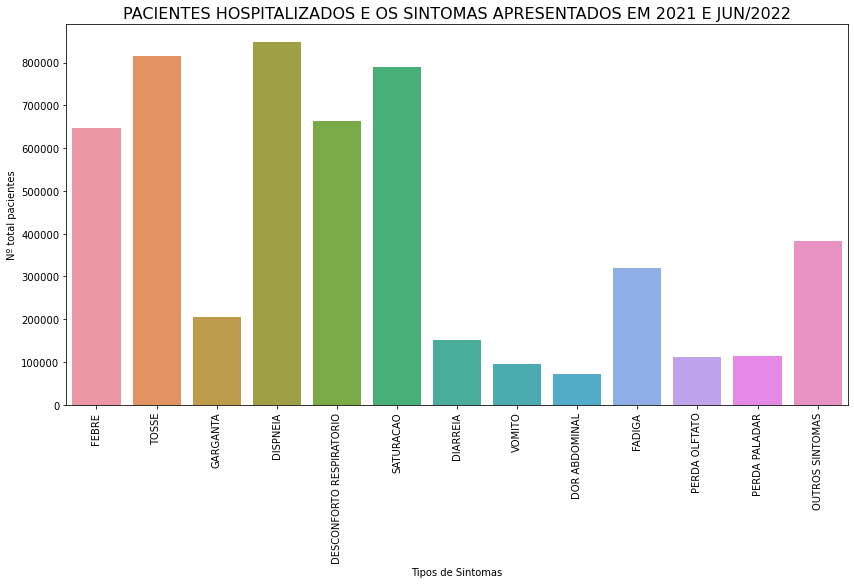

,Sintoma,Quantidade_Total,%
3,DISPNEIA,847080.0,81.06
1,TOSSE,815791.0,78.78
5,SATURACAO,788927.0,78.11
4,DESCONFORTO RESPIRATORIO,662807.0,69.13
0,FEBRE,646626.0,65.49
12,OUTROS SINTOMAS,382972.0,45.92
9,FADIGA,320051.0,37.91
2,GARGANTA,205498.0,24.74
6,DIARREIA,150881.0,18.49
11,PERDA PALADAR,114139.0,14.26


In [40]:
qtde_febre = merged_df.groupby(['FEBRE']).size().reset_index(name='counts')
qtde_tosse = merged_df.groupby(['TOSSE']).size().reset_index(name='counts')
qtde_garganta = merged_df.groupby(['GARGANTA']).size().reset_index(name='counts')
qtde_dispneia = merged_df.groupby(['DISPNEIA']).size().reset_index(name='counts')
qtde_resp = merged_df.groupby(['DESC_RESP']).size().reset_index(name='counts')
qtde_saturacao = merged_df.groupby(['SATURACAO']).size().reset_index(name='counts')
qtde_diarreia = merged_df.groupby(['DIARREIA']).size().reset_index(name='counts')
qtde_vomito = merged_df.groupby(['VOMITO']).size().reset_index(name='counts')
qtde_dor_abd = merged_df.groupby(['DOR_ABD']).size().reset_index(name='counts')
qtde_fadiga = merged_df.groupby(['FADIGA']).size().reset_index(name='counts')
qtde_perda_olft = merged_df.groupby(['PERD_OLFT']).size().reset_index(name='counts')
qtde_perda_paladar = merged_df.groupby(['PERD_PALA']).size().reset_index(name='counts')
qtde_outros = merged_df.groupby(['OUTRO_SIN']).size().reset_index(name='counts')




query_febre     = qtde_febre.query('FEBRE == 1')
query_tosse     = qtde_tosse.query('TOSSE == 1')
query_garganta  = qtde_garganta.query('GARGANTA == 1')
query_dispneia  = qtde_dispneia.query('DISPNEIA == 1')
query_resp      = qtde_resp.query('DESC_RESP == 1')
query_saturacao = qtde_saturacao.query('SATURACAO == 1')
query_diarreia  = qtde_diarreia.query('DIARREIA == 1')
query_vomito    = qtde_vomito.query('VOMITO == 1')
query_dor_abd   = qtde_dor_abd.query('DOR_ABD == 1')
query_fadiga    = qtde_fadiga.query('FADIGA == 1')
query_perda_olft = qtde_perda_olft.query('PERD_OLFT == 1')
query_perda_paladar = qtde_perda_paladar.query('PERD_PALA == 1')
query_outros        = qtde_outros.query('OUTRO_SIN == 1')

dados = [['FEBRE',query_febre.iloc[0].counts, float('{:.2f}'.format((query_febre.iloc[0].counts / merged_df['FEBRE'].count() ) * 100))],	
         ['TOSSE',query_tosse.iloc[0].counts, float('{:.2f}'.format((query_tosse.iloc[0].counts / merged_df['TOSSE'].count() ) * 100))],	
         ['GARGANTA',query_garganta.iloc[0].counts, float('{:.2f}'.format((query_garganta.iloc[0].counts / merged_df['GARGANTA'].count() ) * 100))],	
         ['DISPNEIA',query_dispneia.iloc[0].counts, float('{:.2f}'.format((query_dispneia.iloc[0].counts / merged_df['DISPNEIA'].count() ) * 100))],	
         ['DESCONFORTO RESPIRATORIO',query_resp.iloc[0].counts, float('{:.2f}'.format((query_resp.iloc[0].counts / merged_df['DESC_RESP'].count() ) * 100))],	
         ['SATURACAO',query_saturacao.iloc[0].counts, float('{:.2f}'.format((query_saturacao.iloc[0].counts / merged_df['SATURACAO'].count() ) * 100))],	
         ['DIARREIA',query_diarreia.iloc[0].counts, float('{:.2f}'.format((query_diarreia.iloc[0].counts / merged_df['DIARREIA'].count() ) * 100))],	
         ['VOMITO',query_vomito.iloc[0].counts, float('{:.2f}'.format((query_vomito.iloc[0].counts / merged_df['VOMITO'].count() ) * 100))],	
         ['DOR ABDOMINAL',query_dor_abd.iloc[0].counts, float('{:.2f}'.format((query_dor_abd.iloc[0].counts / merged_df['DOR_ABD'].count() ) * 100))],	
         ['FADIGA',query_fadiga.iloc[0].counts, float('{:.2f}'.format((query_fadiga.iloc[0].counts / merged_df['FADIGA'].count() ) * 100))],
         ['PERDA OLFTATO',query_perda_olft.iloc[0].counts, float('{:.2f}'.format((query_perda_olft.iloc[0].counts / merged_df['PERD_OLFT'].count() ) * 100))],	
         ['PERDA PALADAR',query_perda_paladar.iloc[0].counts, float('{:.2f}'.format((query_perda_paladar.iloc[0].counts / merged_df['PERD_PALA'].count() ) * 100))],	
         ['OUTROS SINTOMAS',query_outros.iloc[0].counts, float('{:.2f}'.format((query_outros.iloc[0].counts / merged_df['OUTRO_SIN'].count() ) * 100))]]

sintomas = pd.DataFrame(dados, columns = ['Sintoma', 'Quantidade_Total', '%'])

plt.figure(figsize=(14,7))
bar_sintomas = sns.barplot(x="Sintoma", y="Quantidade_Total", data=sintomas)
bar_sintomas.set_xticklabels(bar_sintomas.get_xticklabels(),rotation=90);
plt.title('PACIENTES HOSPITALIZADOS E OS SINTOMAS APRESENTADOS EM 2021 E JUN/2022', fontsize=16)
bar_sintomas.set(xlabel='Tipos de Sintomas', ylabel='Nº total pacientes');
plt.show();
sintomas.sort_values(by='Quantidade_Total', ascending=False)

# PERCEBE-SE QUE OS SINTOMAS DO TEMPO GERAL SÃO UM POUCO DIFERENTES DOS SINTOMAS APRESENTADOS APENAS NO PERÍODO DE DEZ/2021 E JAN/2022

In [41]:
print(merged_df)

        DT_SIN_PRI  SEM_PRI    IBGE  FEBRE  TOSSE  GARGANTA  DISPNEIA  \
1       03/01/2021        1  500270    1.0    1.0       1.0       1.0   
4       05/01/2021        1  351880    2.0    2.0       2.0       1.0   
9       05/01/2021        1  330455    NaN    1.0       NaN       1.0   
14      03/01/2021        1  351280    1.0    1.0       1.0       1.0   
18      03/01/2021        1  355030    1.0    1.0       2.0       2.0   
...            ...      ...     ...    ...    ...       ...       ...   
303338  04/05/2022       18  354880    1.0    1.0       NaN       1.0   
303352  30/05/2022       22  410480    2.0    1.0       2.0       1.0   
303353  04/06/2022       22  352590    1.0    NaN       NaN       NaN   
303356  02/06/2022       22  431440    2.0    1.0       1.0       1.0   
303362  06/06/2022       23  355030    NaN    NaN       NaN       NaN   

        DESC_RESP  SATURACAO  DIARREIA  VOMITO  OUTRO_SIN  HOSPITAL  \
1             1.0        1.0       1.0     1.0      

In [42]:
merged_df.value_counts('CLASSI_FIN')

CLASSI_FIN
1.0    1169912
0.0      14818
dtype: int64

## MANIPULAÇÃO PARA GERAÇÃO DE GRÁFICOS

In [43]:
merged_df['DT_SIN_PRI'] = pd.to_datetime(merged_df['DT_SIN_PRI'],format='%d/%m/%Y', errors='ignore')

In [44]:
dados_order = merged_df.sort_values(by=['DT_SIN_PRI'])

In [45]:
dados_order

,DT_SIN_PRI,SEM_PRI,IBGE,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,HOSPITAL,CLASSI_FIN,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
1,2021-01-03,1,500270,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0
741697,2021-01-03,1,240810,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
741637,2021-01-03,1,354340,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
741631,2021-01-03,1,250400,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
371275,2021-01-03,1,352590,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85603,2022-06-11,23,355030,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
112015,2022-06-11,23,350900,2.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN,1.0,1.0,1.0,1.0,1.0,2.0,2.0
160505,2022-06-11,23,354980,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,1.0,1.0,1.0,1.0,2.0,2.0
94688,2022-06-11,23,350340,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN


In [46]:
df_infflu = dados_order[dados_order['CLASSI_FIN']==0.0]
df_infcov = dados_order[dados_order['CLASSI_FIN']==1.0]

In [47]:
freq=dados_order.DT_SIN_PRI.value_counts().to_frame()
freqflu=df_infflu.DT_SIN_PRI.value_counts().to_frame()
freqcov=df_infcov.DT_SIN_PRI.value_counts().to_frame()


In [48]:
freq.rename(columns={'DT_SIN_PRI':'Nr_Casos_Totais'}, inplace=True)
freqflu.rename(columns={'DT_SIN_PRI':'Nr_Casos_INFLU'}, inplace=True)
freqcov.rename(columns={'DT_SIN_PRI':'Nr_Casos_COVID'}, inplace=True)


In [49]:
freq

,Nr_Casos_Totais
2021-03-01,11830
2021-03-10,10544
2021-03-15,9709
2021-03-20,9379
2021-04-01,9033
...,...
2022-04-13,67
2022-06-08,62
2022-06-09,23
2022-06-10,9


In [50]:
dados_order = dados_order[['DT_SIN_PRI']]


In [51]:
dados_order

,DT_SIN_PRI
1,2021-01-03
741697,2021-01-03
741637,2021-01-03
741631,2021-01-03
371275,2021-01-03
...,...
85603,2022-06-11
112015,2022-06-11
160505,2022-06-11
94688,2022-06-11


In [52]:
dados_order.drop_duplicates(keep='first', inplace=True)
dados_order.reset_index(drop=True, inplace=True)

In [53]:
dados_order=dados_order.join(freq, on='DT_SIN_PRI',lsuffix='DT_L')
dados_order=dados_order.join(freqflu, on='DT_SIN_PRI',lsuffix='DT_Lflu')
dados_order=dados_order.join(freqcov, on='DT_SIN_PRI',lsuffix='DT_rflu')


In [54]:
dados_order

,DT_SIN_PRI,Nr_Casos_Totais,Nr_Casos_INFLU,Nr_Casos_COVID
0,2021-01-03,3391,10.0,3381
1,2021-01-04,3827,3.0,3824
2,2021-01-05,3490,5.0,3485
3,2021-01-06,3020,2.0,3018
4,2021-01-07,3112,9.0,3103
...,...,...,...,...
520,2022-06-07,80,1.0,79
521,2022-06-08,62,2.0,60
522,2022-06-09,23,NaN,23
523,2022-06-10,9,NaN,9


In [55]:
dados_order=dados_order.rename(columns = {'DT_SIN_PRI': 'DATE'})


In [56]:
dados_order.isnull().sum(axis = 0)

DATE                0
Nr_Casos_Totais     0
Nr_Casos_INFLU     32
Nr_Casos_COVID      0
dtype: int64

In [57]:
dados_order = dados_order.fillna(0)

In [58]:
import matplotlib.pyplot as plt
x = list(dados_order['DATE'])
y = list(dados_order['Nr_Casos_Totais'])
y1 = list(dados_order['Nr_Casos_INFLU'])
y2 = list(dados_order['Nr_Casos_COVID'])

## 3.4 QUANTIDADE TOTAL DE CASOS DE HOSPITALIZAÇÃO DE COVID E INFLUENZA SOMADOS EM 2021 A JUN/2022

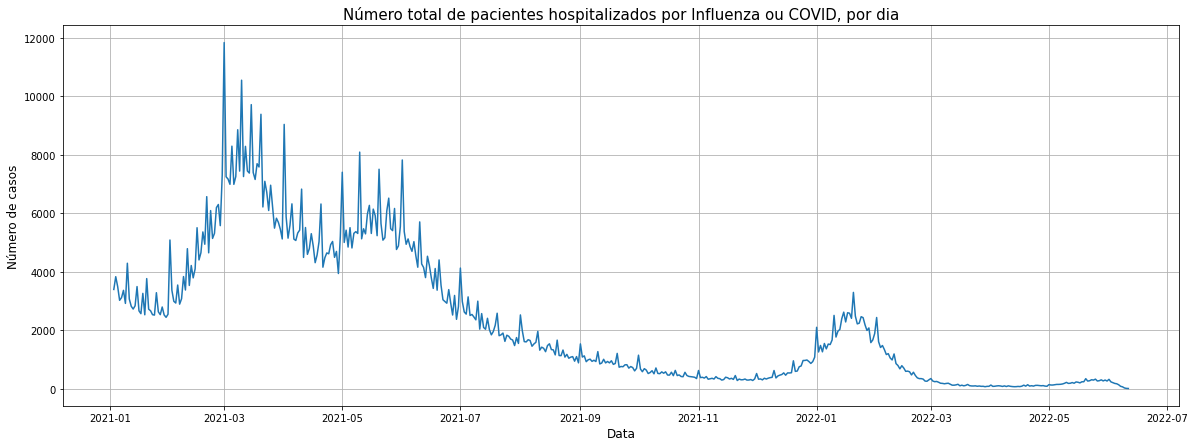

In [59]:
plt.rcParams["figure.figsize"] = (20,7)
plt.plot(x,y)
plt.ylabel('Número de casos',size=12)
plt.xlabel('Data',size=12)
plt.title('Número total de pacientes hospitalizados por Influenza ou COVID, por dia',size=15)
plt.grid()
plt.show()

## 3.5 QUANTIDADE TOTAL DE CASOS DE HOSPITALIZAÇÃO DE COVID E INFLUENZA SEPARADOS EM 2021 A JUN/2022

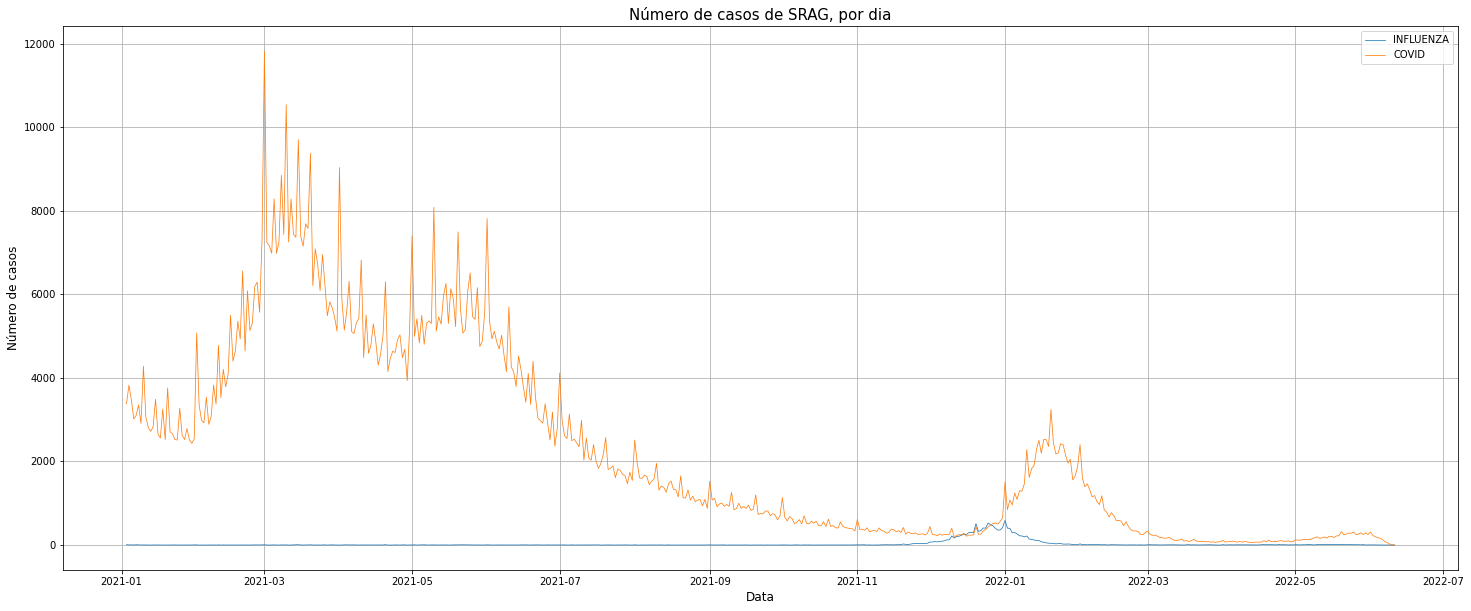

In [60]:
plt.figure(figsize=(25, 10))

plt.plot(x,y1, linewidth=.75)
plt.plot(x,y2, linewidth=.75)

plt.ylabel('Número de casos',size=12)
plt.xlabel('Data',size=12)
plt.title('Número de casos de SRAG, por dia',size=15)
plt.grid()
plt.legend(['INFLUENZA','COVID'])

plt.show()

In [61]:
df_flu = dados_order.iloc[332:394]

In [62]:
xflu = list(df_flu['DATE'])
yflu = list(df_flu['Nr_Casos_INFLU'])
ycov = list(df_flu['Nr_Casos_COVID'])

In [63]:
df_flu.head(100)

,DATE,Nr_Casos_Totais,Nr_Casos_INFLU,Nr_Casos_COVID
332,2021-12-01,517,72.0,445
333,2021-12-02,323,73.0,250
334,2021-12-03,332,85.0,247
335,2021-12-04,300,76.0,224
336,2021-12-05,356,89.0,267
...,...,...,...,...
389,2022-01-27,1989,26.0,1963
390,2022-01-28,2075,23.0,2052
391,2022-01-29,1574,13.0,1561
392,2022-01-30,1664,10.0,1654


# 3.6 HOSPITALIZAÇÃO DE CASOS EM DEZ/2021 E JAN/2022 (ESSE PERÍODO SERÁ O ANALISADO NO MODELO DE MACHINE LEARNING)

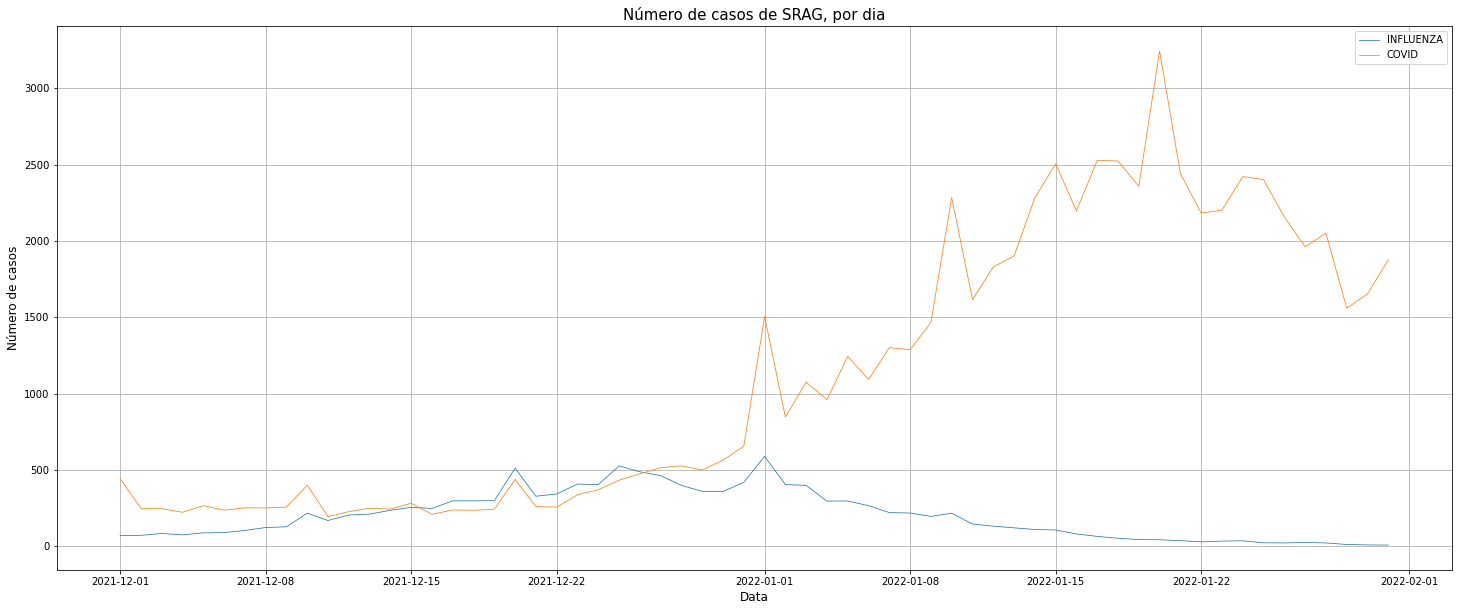

In [64]:
plt.figure(figsize=(25, 10))

plt.plot(xflu,yflu, linewidth=.75)
plt.plot(xflu,ycov, linewidth=.75)

plt.ylabel('Número de casos',size=12)
plt.xlabel('Data',size=12)
plt.title('Número de casos de SRAG, por dia',size=15)
plt.grid()
plt.legend(['INFLUENZA','COVID'])

plt.show()

#  3.7 Manipulação do banco de dados do Índice de Gini da renda domiciliar per capita segundo Município - Brasil
# Fonte: IBGE/Censos Demográficos 1991, 2000 e 2010 

In [65]:
file_gini = r'......\datasets\datasets\gini.csv'
dados_gini = pd.read_csv(file_gini, delimiter=';', 
encoding='ISO-8859-1')

 
print (dados_gini)
dados_gini.shape
dados_gini.head()

     Índice de Gini da renda domiciliar per capita segundo Município - Brasil  \
0                            Período: 1991, 2000 e 2010                         
1                                             Município                         
2                          110001 Alta Floresta D'Oeste                         
3                        110037 Alto Alegre dos Parecis                         
4                                   110040 Alto Paraíso                         
...                                                 ...                         
5564                                    522220 Vila Boa                         
5565                               522230 Vila Propício                         
5566                                    530010 Brasília                         
5567                                              Total                         
5568  Fonte: IBGE/Censos Demográficos 1991, 2000 e 2010                         

     Unnamed: 1 Unnamed: 2 

,Índice de Gini da renda domiciliar per capita segundo Município - Brasil,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,"Período: 1991, 2000 e 2010",NaN,NaN,NaN
1,Município,1991,2000,2010
2,110001 Alta Floresta D'Oeste,"0,5983","0,5868","0,5893"
3,110037 Alto Alegre dos Parecis,...,"0,508","0,5491"
4,110040 Alto Paraíso,...,"0,6256","0,5417"


In [66]:
dados_gini = dados_gini.drop('Unnamed: 1', axis=1)
dados_gini = dados_gini.drop('Unnamed: 2', axis=1)

dados_gini = dados_gini.iloc[2:]
dados_gini = dados_gini.iloc[:-2,:]

dados_gini.columns = ['Município', '2010']
dados_gini = dados_gini.reset_index(drop=True)

In [67]:
print (dados_gini)
dados_gini.shape
dados_gini.info()

                           Município    2010
0       110001 Alta Floresta D'Oeste  0,5893
1     110037 Alto Alegre dos Parecis  0,5491
2                110040 Alto Paraíso  0,5417
3            110034 Alvorada D'Oeste  0,5355
4                   110002 Ariquemes  0,5496
...                              ...     ...
5560               522200 Vianópolis  0,4672
5561           522205 Vicentinópolis  0,4824
5562                 522220 Vila Boa  0,4935
5563            522230 Vila Propício   0,524
5564                 530010 Brasília   0,637

[5565 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Município  5565 non-null   object
 1   2010       5565 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [68]:
dados_gini.isnull().sum(axis = 0)
dados_gini['IBGE'] = dados_gini['Município'].str[:7]


dados_gini['Município'] = dados_gini['Município'].str[7:]

print(dados_gini)

                    Município    2010     IBGE
0       Alta Floresta D'Oeste  0,5893  110001 
1     Alto Alegre dos Parecis  0,5491  110037 
2                Alto Paraíso  0,5417  110040 
3            Alvorada D'Oeste  0,5355  110034 
4                   Ariquemes  0,5496  110002 
...                       ...     ...      ...
5560               Vianópolis  0,4672  522200 
5561           Vicentinópolis  0,4824  522205 
5562                 Vila Boa  0,4935  522220 
5563            Vila Propício   0,524  522230 
5564                 Brasília   0,637  530010 

[5565 rows x 3 columns]


In [69]:
dados_gini.info()
dados_22.info()
dados_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Município  5565 non-null   object
 1   2010       5565 non-null   object
 2   IBGE       5565 non-null   object
dtypes: object(3)
memory usage: 130.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 77268 entries, 1 to 303266
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEM_PRI     77268 non-null  int64  
 1   IBGE        77268 non-null  int64  
 2   FEBRE       77268 non-null  float64
 3   TOSSE       77268 non-null  float64
 4   GARGANTA    77268 non-null  float64
 5   DISPNEIA    77268 non-null  float64
 6   DESC_RESP   77268 non-null  float64
 7   SATURACAO   77268 non-null  float64
 8   DIARREIA    77268 non-null  float64
 9   VOMITO      77268 non-null  float64
 10  OUTRO_SIN   77268 non-null  float64
 11  CLASSI_FI

In [70]:
merged_df = pd.concat([dados_22, dados_21])

In [71]:
merged_df

,SEM_PRI,IBGE,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,CLASSI_FIN,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
1,1,355030,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,355030,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,355030,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,292740,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,1,430510,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728791,52,330455,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1728794,52,354870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1728806,49,521250,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1728817,49,240800,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [72]:
merged_df.reset_index(drop=True, inplace=True)
merged_df.shape


(100565, 16)

In [73]:
print(merged_df)

        SEM_PRI    IBGE  FEBRE  TOSSE  GARGANTA  DISPNEIA  DESC_RESP  \
0             1  355030    1.0    0.0       0.0       0.0        0.0   
1             1  355030    0.0    0.0       0.0       0.0        1.0   
2             1  355030    0.0    1.0       1.0       1.0        0.0   
3             1  292740    0.0    0.0       0.0       0.0        1.0   
4             1  430510    1.0    1.0       1.0       1.0        0.0   
...         ...     ...    ...    ...       ...       ...        ...   
100560       52  330455    1.0    1.0       0.0       0.0        0.0   
100561       52  354870    0.0    0.0       0.0       0.0        0.0   
100562       49  521250    1.0    1.0       0.0       1.0        1.0   
100563       49  240800    1.0    1.0       0.0       1.0        1.0   
100564       52  230440    0.0    0.0       0.0       0.0        0.0   

        SATURACAO  DIARREIA  VOMITO  OUTRO_SIN  CLASSI_FIN  DOR_ABD  FADIGA  \
0             0.0       1.0     0.0        0.0         1

In [74]:
dados_gini.info()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Município  5565 non-null   object
 1   2010       5565 non-null   object
 2   IBGE       5565 non-null   object
dtypes: object(3)
memory usage: 130.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100565 entries, 0 to 100564
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   SEM_PRI     100565 non-null  int64  
 1   IBGE        100565 non-null  int64  
 2   FEBRE       100565 non-null  float64
 3   TOSSE       100565 non-null  float64
 4   GARGANTA    100565 non-null  float64
 5   DISPNEIA    100565 non-null  float64
 6   DESC_RESP   100565 non-null  float64
 7   SATURACAO   100565 non-null  float64
 8   DIARREIA    100565 non-null  float64
 9   VOMITO      100565 non-null  float64
 10  OUTRO_SIN   100565 non-null  float64


In [75]:
dados_gini["IBGE"] = pd.to_numeric(dados_gini["IBGE"])


## União dos datasets da SRAG junto com os do IBGE

In [76]:
dfz = pd.merge(merged_df, dados_gini)

In [77]:
dados_gini.info()
merged_df.info()
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Município  5565 non-null   object
 1   2010       5565 non-null   object
 2   IBGE       5565 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100565 entries, 0 to 100564
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   SEM_PRI     100565 non-null  int64  
 1   IBGE        100565 non-null  int64  
 2   FEBRE       100565 non-null  float64
 3   TOSSE       100565 non-null  float64
 4   GARGANTA    100565 non-null  float64
 5   DISPNEIA    100565 non-null  float64
 6   DESC_RESP   100565 non-null  float64
 7   SATURACAO   100565 non-null  float64
 8   DIARREIA    100565 non-null  float64
 9   VOMITO      100565 non-null  float64
 10  OUTRO_SIN   100565 non-null

In [78]:
print(dfz)

        SEM_PRI    IBGE  FEBRE  TOSSE  GARGANTA  DISPNEIA  DESC_RESP  \
0             1  355030    1.0    0.0       0.0       0.0        0.0   
1             1  355030    0.0    0.0       0.0       0.0        1.0   
2             1  355030    0.0    1.0       1.0       1.0        0.0   
3             1  355030    0.0    0.0       0.0       1.0        1.0   
4             1  355030    0.0    1.0       0.0       0.0        0.0   
...         ...     ...    ...    ...       ...       ...        ...   
100559       52  430230    0.0    1.0       1.0       1.0        1.0   
100560       48  130406    1.0    1.0       0.0       1.0        1.0   
100561       50  150145    1.0    1.0       0.0       1.0        0.0   
100562       49  330260    0.0    1.0       0.0       1.0        1.0   
100563       48  250320    0.0    0.0       0.0       1.0        1.0   

        SATURACAO  DIARREIA  VOMITO  OUTRO_SIN  CLASSI_FIN  DOR_ABD  FADIGA  \
0             0.0       1.0     0.0        0.0         1

In [79]:
dfz1 = dfz['Município'].value_counts().iloc[:50]
print(dfz1)

São Paulo                12059
Rio de Janeiro            4914
Fortaleza                 3380
Belo Horizonte            2332
Brasília                  2005
Salvador                  1767
Curitiba                  1562
Manaus                    1464
Campinas                  1342
Goiânia                   1160
Porto Alegre              1007
São José do Rio Preto      981
São Bernardo do Campo      976
Recife                     858
São José dos Campos        843
Guarulhos                  808
Sorocaba                   797
Natal                      693
Maceió                     683
Ribeirão Preto             669
Cuiabá                     666
Niterói                    664
Maringá                    662
Londrina                   653
Teresina                   650
João Pessoa                620
Campo Grande               619
São Luís                   579
Aracaju                    570
Santo André                560
Florianópolis              550
Uberlândia                 541
Jundiaí 

##  3.8 CASOS DE HOSPITALIZAÇÃO POR COVID E INFLUENZA NAS 50 CIDADES MAIS AFETADAS

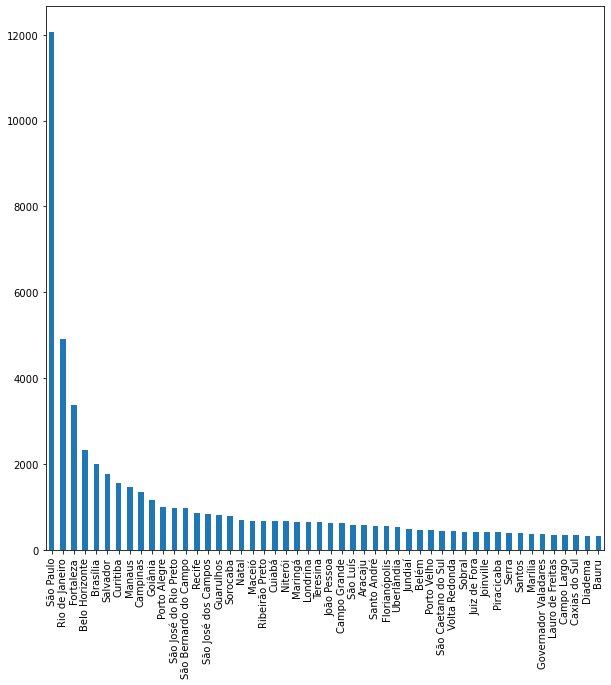

In [80]:
plot = dfz1.plot.bar(y='CLASSI_FIN',x='Município', figsize=(10, 10))

##  3.9 MANIPULAÇÃO DO BANCO DE DADOS PARA SELECIONAR AS 50 CIDADES MAIS AFETADAS COM CASOS DE HOSPITALIZAÇÃO POR COVID E INFLUENZA

In [81]:
dfsel = dfz[dfz['IBGE'].isin([355030,
330455,
230440,
310620,
530010,
292740,
130260,
410690,
350950,
431490,
354980,
520870,
354870,
261160,
355220,
354990,
351880,
354340,
240810,
510340,
411520,
221100,
411370,
250750,
270430,
280030,
420540,
317020,
354780,
211130,
500270,
352590,
354880,
330630,
231290,
420910,
353870,
150140,
110020,
330330,
352900,
313670,
320500,
354850,
291920,
430510,
312770,
351380,
350600,
293330])]

In [82]:
dfsel

,SEM_PRI,IBGE,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,CLASSI_FIN,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,Município,2010
0,1,355030,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,São Paulo,"0,6453"
1,1,355030,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,São Paulo,"0,6453"
2,1,355030,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,São Paulo,"0,6453"
3,1,355030,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,São Paulo,"0,6453"
4,1,355030,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,São Paulo,"0,6453"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77954,52,351380,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Diadema,"0,4592"
77955,49,351380,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Diadema,"0,4592"
77956,50,351380,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Diadema,"0,4592"
77957,51,351380,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,Diadema,"0,4592"


In [83]:
dfsel["2010"]=dfsel["2010"].str.replace(',','.')

In [84]:
dfsel['2010'] = dfsel['2010'].astype('float64')

In [85]:
dfsel.head()

,SEM_PRI,IBGE,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,CLASSI_FIN,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,Município,2010
0,1,355030,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,São Paulo,0.6453
1,1,355030,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,São Paulo,0.6453
2,1,355030,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,São Paulo,0.6453
3,1,355030,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,São Paulo,0.6453
4,1,355030,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,São Paulo,0.6453


In [86]:
dfsel['2010'].median()

0.6267

In [87]:
dfsel['2010'] = dfsel['2010'].astype(float)

## TRANSFORMAÇÃO DOS DADOS DE GINI EM LÓGICA BINÁRIA, VALORES MAIORES QUE 0.6267 SERÃO REGISTRADO COMO 1.0 E VALORES MENOS COMO 0.0

In [88]:
dfsel['2010'] = ['0.0' if x<=0.6267 else '1.0' for x in dfsel['2010']]
dfsel

,SEM_PRI,IBGE,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,CLASSI_FIN,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,Município,2010
0,1,355030,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,São Paulo,1.0
1,1,355030,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,São Paulo,1.0
2,1,355030,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,São Paulo,1.0
3,1,355030,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,São Paulo,1.0
4,1,355030,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,São Paulo,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77954,52,351380,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Diadema,0.0
77955,49,351380,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Diadema,0.0
77956,50,351380,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Diadema,0.0
77957,51,351380,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,Diadema,0.0


In [89]:
dfsel['2010'].value_counts()

0.0    29079
1.0    25757
Name: 2010, dtype: int64

In [90]:
dfsel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54836 entries, 0 to 77958
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEM_PRI     54836 non-null  int64  
 1   IBGE        54836 non-null  int64  
 2   FEBRE       54836 non-null  float64
 3   TOSSE       54836 non-null  float64
 4   GARGANTA    54836 non-null  float64
 5   DISPNEIA    54836 non-null  float64
 6   DESC_RESP   54836 non-null  float64
 7   SATURACAO   54836 non-null  float64
 8   DIARREIA    54836 non-null  float64
 9   VOMITO      54836 non-null  float64
 10  OUTRO_SIN   54836 non-null  float64
 11  CLASSI_FIN  54836 non-null  float64
 12  DOR_ABD     54836 non-null  float64
 13  FADIGA      54836 non-null  float64
 14  PERD_OLFT   54836 non-null  float64
 15  PERD_PALA   54836 non-null  float64
 16  Município   54836 non-null  object 
 17  2010        54836 non-null  object 
dtypes: float64(14), int64(2), object(2)
memory usage: 7.9+ MB


In [91]:
dfsel.drop('SEM_PRI', axis=1, inplace=True)
dfsel.drop('IBGE', axis=1, inplace=True)
dfsel.drop('Município', axis=1, inplace=True)


In [92]:
dfsel['2010'] = dfsel['2010'].astype('float64')

In [93]:
dfsel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54836 entries, 0 to 77958
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FEBRE       54836 non-null  float64
 1   TOSSE       54836 non-null  float64
 2   GARGANTA    54836 non-null  float64
 3   DISPNEIA    54836 non-null  float64
 4   DESC_RESP   54836 non-null  float64
 5   SATURACAO   54836 non-null  float64
 6   DIARREIA    54836 non-null  float64
 7   VOMITO      54836 non-null  float64
 8   OUTRO_SIN   54836 non-null  float64
 9   CLASSI_FIN  54836 non-null  float64
 10  DOR_ABD     54836 non-null  float64
 11  FADIGA      54836 non-null  float64
 12  PERD_OLFT   54836 non-null  float64
 13  PERD_PALA   54836 non-null  float64
 14  2010        54836 non-null  float64
dtypes: float64(15)
memory usage: 6.7 MB


### Mapa de correlação

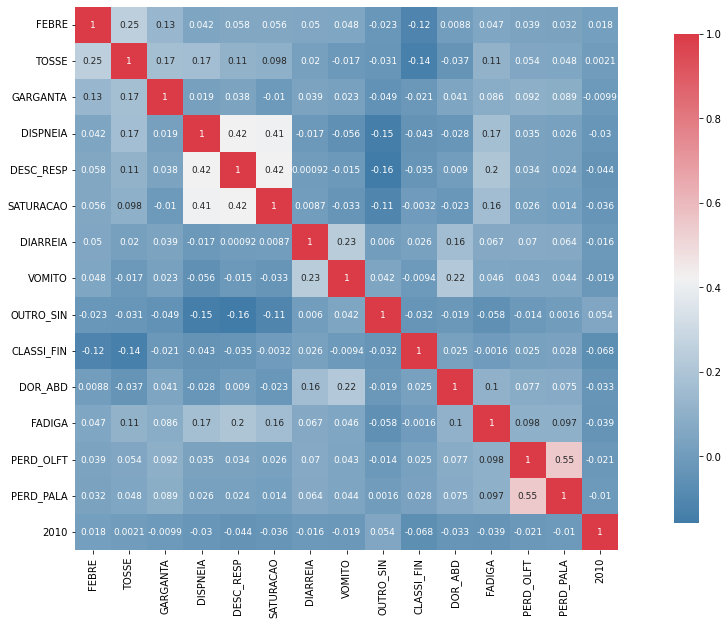

In [94]:
def plot_correlation_map( dfsel ):
    corr = dfsel.corr()
    _ , ax = plt.subplots( figsize =( 20 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 9 })
plot_correlation_map(dfsel)

##  3.10 SALVANDO O ARQUIVO PARA SER ANALISADO POR MODELOS DE MACHINE LEARNING NA PARTE 2

In [95]:
dfsel.reset_index(drop=True, inplace=True)

SAMPLE_SET = dfsel 
SAMPLE_SET.to_csv(r'......\datasets\SAMPLE_SET.csv')

In [96]:
SAMPLE_SET

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,CLASSI_FIN,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,2010
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54831,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
54832,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
54833,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54834,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


# BANCO DE DADOS (SAMPLE_SET) SALVO PARA UTILIZAR NA PARTE 2

# TODOS OS VALORES DELE SÃO BINÁRIOS (0.0 OU 1.0), NÃO EXISTEM VALORES NULOS (NaN) 

# TODAS AS VARIÁVEIS SÃO SINTOMAS, EXCETO POR:
# CLASSI_FIN - REPRESENTA COVID (1.0)  E INFLUENZA (0.0))
# 2010 - REPRESENTA AS CIDADES COM ALTO INDICE DE GINE (1.0) OU BAIXO (0.0). FORAM SELECIONADAS APENAS AS 50 CIDADES QUE HOUVERAM MAIS CASOS DE HOSPITALIZAÇÃO ENTRE DEZ/2021 E JAN/2022